# Task 4.10 Part 1.2

## Script Points

1. Import Data & Libraries
2. Customer Profiling
3. Visualizations of Customer Profiles
4. Aggregation of Customer Profiles
5. Comparing Customer Profiles Across Regions and Departments
6. Exporting


# Import data & libraries

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Create path

path = r'C:\Users\alexi\OneDrive\02-2023 Instacart Basket Analysis'

In [4]:
# Import data set
df_high_activity = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared Data', 'high_activity_customers.pkl'))
df_department = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'departments_wrangled.csv'))

In [5]:
df_high_activity.head(3)

,order_id,user_id,order_number,orders_day_of_week,time_of_order,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,dependant_count,marital_status,income,region,activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,South,High-activity


In [6]:
df_department.head(3)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery


In [7]:
# Rename unnamed column to department id

df_department.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [8]:
df_department.head(2)

,department_id,department
0,1,frozen
1,2,other


# Customer Profiling

## Age

In [9]:
# Check descriptive stats of age

df_high_activity['age'].describe()

count    3.096569e+07
mean     4.946800e+01
std      1.848526e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

Age groups will be : Young Adult 18-39/
                     Middle Aged 40-64/
                     Senior 65+

In [10]:
# Create age groups

df_high_activity.loc[(df_high_activity['age'] >= 18) & (df_high_activity['age'] < 40), 'age_group'] = 'Young Adult'
df_high_activity.loc[(df_high_activity['age'] >= 40) & (df_high_activity['age'] < 65), 'age_group'] = 'Middle-Aged'
df_high_activity.loc[df_high_activity['age'] >= 65, 'age_group'] = 'Senior'

In [11]:
# Check age_group counts

df_high_activity['age_group'].value_counts(dropna = False)

Middle-Aged    12104390
Young Adult    10665490
Senior          8195806
Name: age_group, dtype: int64

## Income

In [12]:
# Check descriptive stats income

df_high_activity['income'].describe()

count    3.096569e+07
mean     9.967573e+04
std      4.314168e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

Income groups will be: Low < 75,000/ Middle <= 75,000 - 125,000/ High >= 125,000 (Based off of quartiles)

In [13]:
# Create the income groups

df_high_activity.loc[df_high_activity['income'] < 75000, 'income_group'] = 'Low'
df_high_activity.loc[(df_high_activity['income'] >= 75000) & (df_high_activity['income'] < 125000), 'income_group'] = 'Middle'
df_high_activity.loc[df_high_activity['income'] >= 125000, 'income_group'] = 'High'

In [14]:
# Check income group count
df_high_activity['income_group'].value_counts(dropna = False)

Middle    12780294
Low        9907061
High       8278331
Name: income_group, dtype: int64

## Number of dependants

In [15]:
# Check descriptive stats dependants

df_high_activity['dependant_count'].describe()

count    3.096569e+07
mean     1.501815e+00
std      1.118897e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: dependant_count, dtype: float64

In [16]:
# Create a crosstab between dependant count and marital status
crosstab = pd.crosstab(df_high_activity['marital_status'], df_high_activity['dependant_count'], dropna = False)

In [17]:
crosstab

dependant_count,0,1,2,3
marital_status,,,,
divorced/widowed,2645371,0,0,0
living with parents and siblings,0,508060,484671,488477
married,0,7211334,7248829,7284299
single,5094645,0,0,0


In [18]:
# Create column for household size

df_high_activity.loc[df_high_activity['dependant_count'] == 0, 'household_size'] = 'Single Household'
df_high_activity.loc[(df_high_activity['dependant_count'] == 1) | (df_high_activity['dependant_count'] == 2), 'household_size'] = 'Medium Household'
df_high_activity.loc[df_high_activity['dependant_count'] == 3, 'household_size'] = 'Large Household'

In [19]:
# Check household size count

df_high_activity['household_size'].value_counts(dropna = False)

Medium Household    15452894
Large Household      7772776
Single Household     7740016
Name: household_size, dtype: int64

In [20]:
# Create a crosstab between household size and marital status

crosstab_house_size = pd.crosstab(df_high_activity['marital_status'], df_high_activity['household_size'], dropna = False)

In [21]:
crosstab_house_size

household_size,Large Household,Medium Household,Single Household
marital_status,,,
divorced/widowed,0,0,2645371
living with parents and siblings,488477,992731,0
married,7284299,14460163,0
single,0,0,5094645


## Department

In [22]:
# Create a data dictionary for departments
data_dict = dict(zip(df_department["department_id"], df_department["department"]))

In [23]:
data_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [24]:
# Create a new column to convert department_id

df_high_activity['department'] = df_high_activity['department_id'].map(data_dict)

In [25]:
# Check department column
df_high_activity['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           671872
personal care       424359
babies              410392
international       255991
alcohol             144674
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

# Visualizations of Customer Profiles

(array([0, 1, 2]),
 [Text(0, 0, 'Middle-Aged'), Text(1, 0, 'Young Adult'), Text(2, 0, 'Senior')])

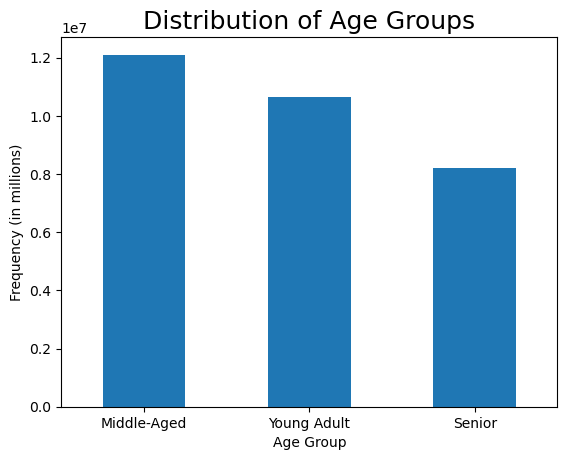

In [26]:
# Create a bar chart for the age_group

bar_age_group = df_high_activity['age_group'].value_counts().plot.bar()

plt.title('Distribution of Age Groups', fontsize = 18)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Age Group', fontsize = 10)
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Middle'), Text(1, 0, 'Low'), Text(2, 0, 'High')])

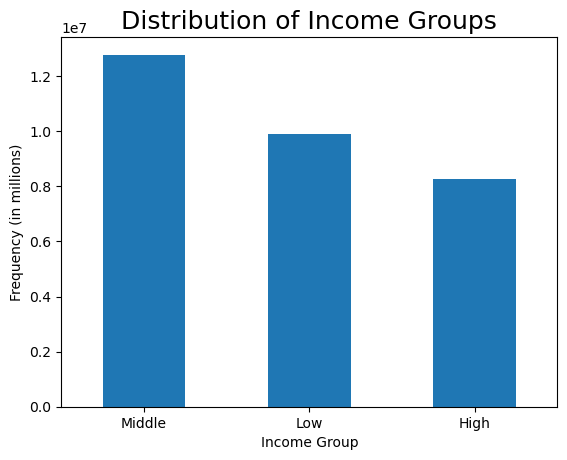

In [27]:
# Create a bar chart for income_group

bar_income_group = df_high_activity['income_group'].value_counts().plot.bar()

plt.title('Distribution of Income Groups', fontsize = 18)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Income Group', fontsize = 10)
plt.xticks(rotation = 0)

(array([0, 1, 2]),
 [Text(0, 0, 'Medium Household'),
  Text(1, 0, 'Large Household'),
  Text(2, 0, 'Single Household')])

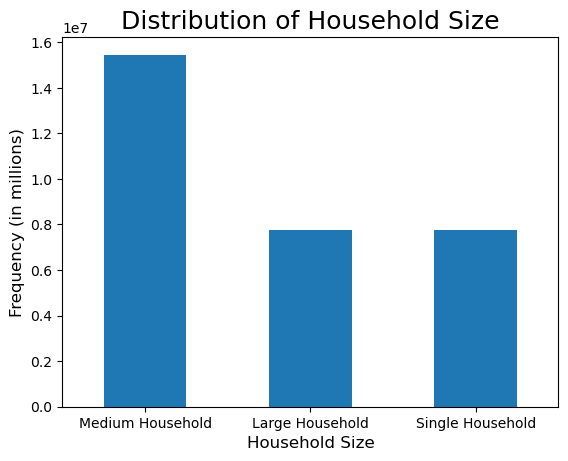

In [28]:
# Create a bar chart for family_size

bar_household_size = df_high_activity['household_size'].value_counts().plot.bar()

plt.title('Distribution of Household Size', fontsize = 18)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Household Size', fontsize = 12)
plt.xticks(rotation = 0)

Text(0.5, 0, 'Department')

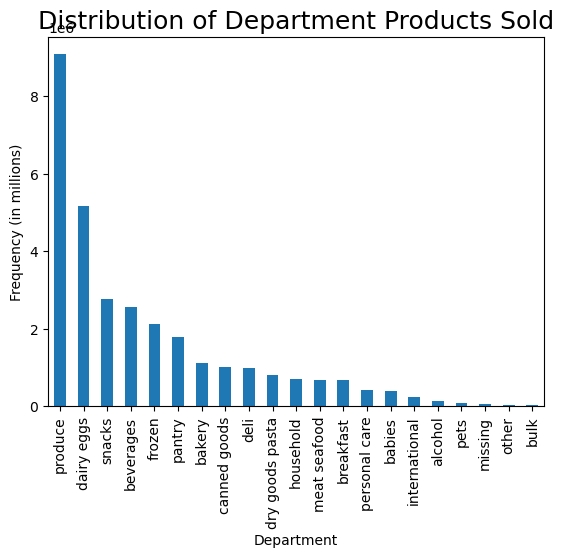

In [29]:
# Create a bar chart for distribution of departments

bar_departments = df_high_activity['department'].value_counts().plot.bar()

plt.title('Distribution of Department Products Sold', fontsize = 18)
plt.ylabel('Frequency (in millions)', fontsize = 10)
plt.xlabel('Department', fontsize = 10)

# Aggregation of Customer Profiles

In [30]:
# Age_group aggregation by usage frequency

df_high_activity.groupby('age_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
age_group                             
Middle-Aged          8.354274   1  145
Senior               8.307827   1   99
Young Adult          8.415600   1  109

In [31]:
# by expenditure

df_high_activity.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_group                           
Middle-Aged  11.944695  1.0  99999.0
Senior       11.757620  1.0  99999.0
Young Adult  12.055481  1.0  99999.0

In [32]:
# Income_group aggregation by usage frequency

df_high_activity.groupby('income_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
income_group                           
High                  8.494156   1  121
Low                   8.049147   1  137
Middle                8.521588   1  145

In [33]:
# by expenditure

df_high_activity.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices              
                   mean  min      max
income_group                         
High          21.193370  1.0  99999.0
Low            7.451164  1.0  14900.0
Middle         9.409735  1.0  99999.0

In [34]:
# Family_size aggregation by usage frequency

df_high_activity.groupby('household_size').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
household_size                             
Large Household           8.375119   1  145
Medium Household          8.370308   1  114
Single Household          8.336653   1  137

In [35]:
# by expenditure

df_high_activity.groupby('household_size').agg({'prices' : ['mean', 'min', 'max']})

prices              
                       mean  min      max
household_size                           
Large Household   11.791445  1.0  99999.0
Medium Household  11.920012  1.0  99999.0
Single Household  12.102442  1.0  99999.0

# Comparing Customer Profiles Across Regions and Departments

In [36]:
# Compare age_group across regions

age_region_crosstab = pd.crosstab(df_high_activity['region'], df_high_activity['age_group'], dropna = False)
age_region_crosstab

age_group,Middle-Aged,Senior,Young Adult
region,,,
Midwest,2874559,1904119,2483085
Northeast,2108230,1484857,1871792
South,3994605,2708539,3608387
West,3126996,2098291,2702226


Text(0.5, 0, 'Regions')

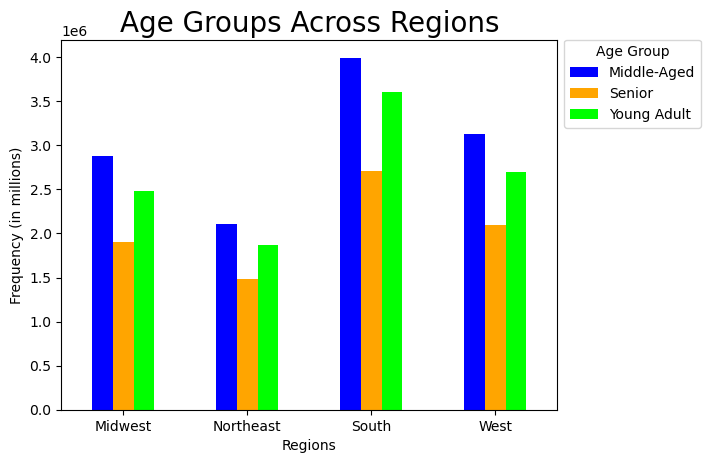

In [37]:
# Create a stacked bar chart for age_group and region

bar_age_region = age_region_crosstab.plot(kind = 'bar', rot = 0, color = ['blue', 'orange', 'lime'])
bar_age_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [38]:
# Compare age groups across departments

age_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['age_group'], dropna = False)
age_department_crosstab

age_group,Middle-Aged,Senior,Young Adult
department,,,
alcohol,56292,36720,51662
babies,162732,106204,141456
bakery,438829,295997,386002
beverages,1013708,684020,874173
breakfast,264061,175518,232293
bulk,12882,8945,11624
canned goods,394849,267509,349716
dairy eggs,2015807,1368072,1793303
deli,392790,265199,345845


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

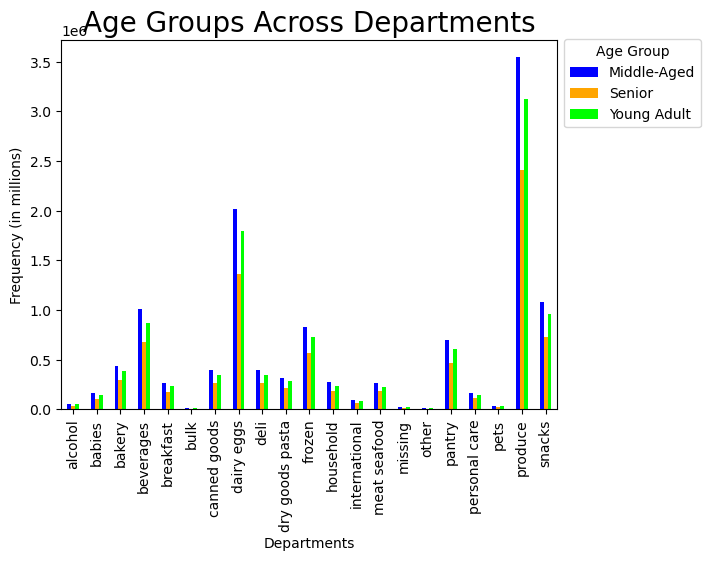

In [39]:
# Create a stacked bar chart for age_group and region
bar_age_department = age_department_crosstab.plot(kind = 'bar', rot = 0, color = ['blue', 'orange', 'lime'])
bar_age_department.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [40]:
# Compare income groups across regions

income_region_crosstab = pd.crosstab(df_high_activity['region'], df_high_activity['income_group'], dropna = False)
income_region_crosstab

income_group,High,Low,Middle
region,,,
Midwest,1971660,2300620,2989483
Northeast,1473372,1730055,2261452
South,2719416,3313751,4278364
West,2113883,2562635,3250995


Text(0.5, 0, 'Regions')

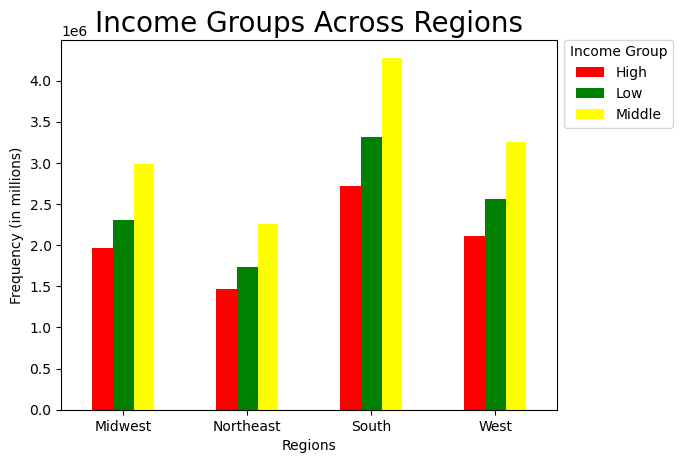

In [41]:
# Create a stacked bar chart for income_group and region
bar_income_region = income_region_crosstab.plot(kind = 'bar', rot = 0, color = ['red', 'green', 'yellow'])
bar_income_region.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [42]:
# Compare income groups across departments

income_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['income_group'], dropna = False)
income_department_crosstab

income_group,High,Low,Middle
department,,,
alcohol,43141,44581,56952
babies,114043,114785,181564
bakery,309803,341470,469555
beverages,660418,911389,1000094
breakfast,174382,233415,264075
bulk,8053,11926,13472
canned goods,283724,295130,433220
dairy eggs,1404631,1600647,2171904
deli,267853,318815,417166


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

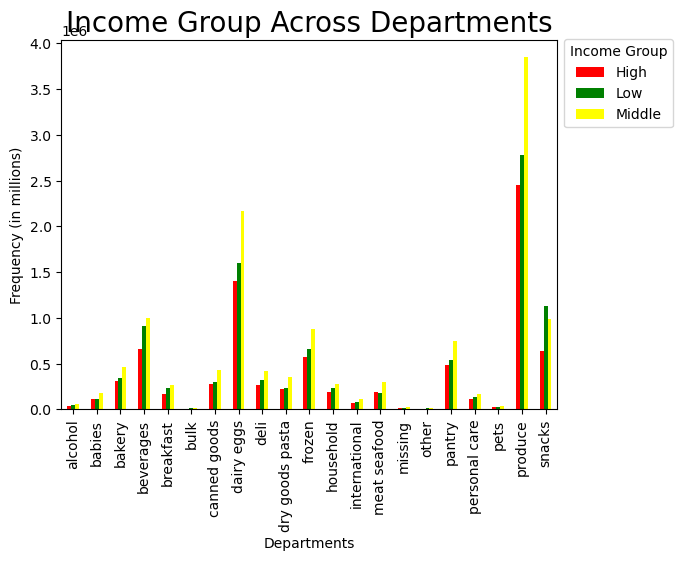

In [43]:
# Create a stacked bar chart for income_group and department
bar_income_department = income_department_crosstab.plot(kind = 'bar', rot = 0, color = ['red', 'green', 'yellow'])
bar_income_department.legend(title = 'Income Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Group Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

In [44]:
# Compare family size across regions

family_region_crosstab = pd.crosstab(df_high_activity['region'], df_high_activity['household_size'], dropna = False)
family_region_crosstab

household_size,Large Household,Medium Household,Single Household
region,,,
Midwest,1787346,3651527,1822890
Northeast,1381277,2729052,1354550
South,2585960,5143535,2582036
West,2018193,3928780,1980540


Text(0.5, 0, 'Regions')

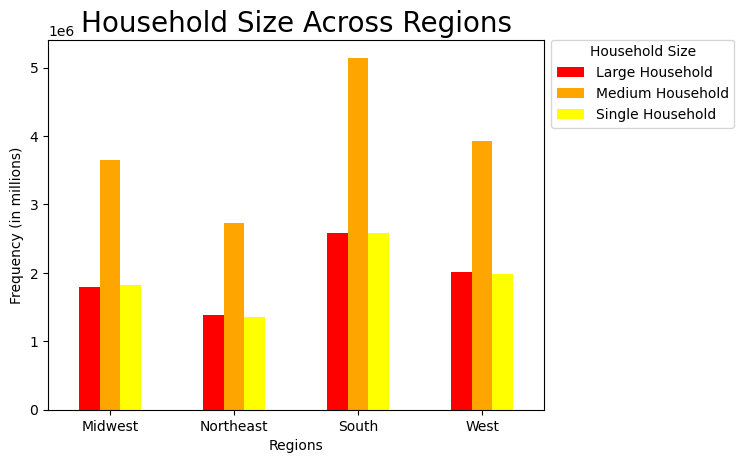

In [45]:
# Create a stacked bar chart for family size and region
bar_family_region = family_region_crosstab.plot(kind = 'bar', rot = 0, color = ['red', 'orange', 'yellow'])
bar_family_region.legend(title = 'Household Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Household Size Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

In [46]:
# Compare family size across departments

family_department_crosstab = pd.crosstab(df_high_activity['department'], df_high_activity['household_size'], dropna = False)
family_department_crosstab

household_size,Large Household,Medium Household,Single Household
department,,,
alcohol,37344,70478,36852
babies,102585,204479,103328
bakery,279822,559611,281395
beverages,640927,1285633,645341
breakfast,167563,337589,166720
bulk,8403,17048,8000
canned goods,255325,505729,251020
dairy eggs,1296264,2586542,1294376
deli,252592,497860,253382


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'babies'),
  Text(2, 0, 'bakery'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'breakfast'),
  Text(5, 0, 'bulk'),
  Text(6, 0, 'canned goods'),
  Text(7, 0, 'dairy eggs'),
  Text(8, 0, 'deli'),
  Text(9, 0, 'dry goods pasta'),
  Text(10, 0, 'frozen'),
  Text(11, 0, 'household'),
  Text(12, 0, 'international'),
  Text(13, 0, 'meat seafood'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'pantry'),
  Text(17, 0, 'personal care'),
  Text(18, 0, 'pets'),
  Text(19, 0, 'produce'),
  Text(20, 0, 'snacks')])

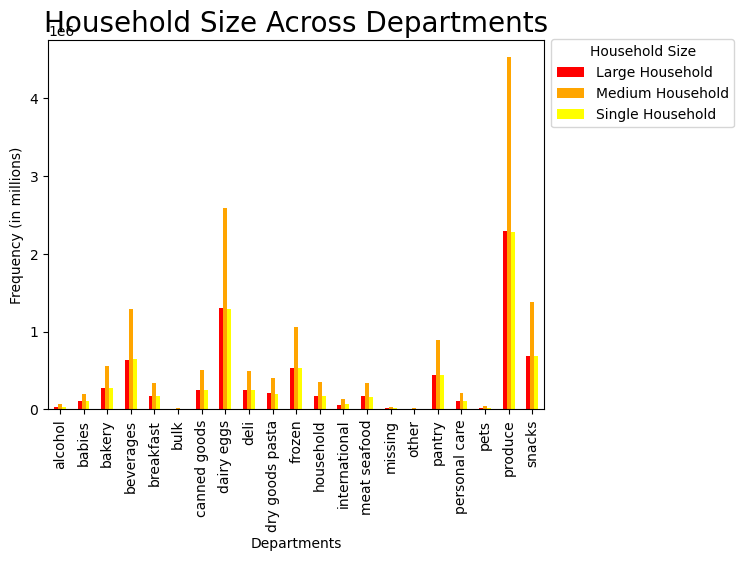

In [47]:
# Create a stacked bar chart for family size and department
bar_family_department = family_department_crosstab.plot(kind = 'bar', rot = 0, color = ['red', 'orange', 'yellow'])
bar_family_department.legend(title = 'Household Size', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Household Size Across Departments', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Departments')
plt.xticks(rotation = 90)

Customer behaviors stay consistent throughout each region. Medium sized household and middle income earners make up the largest part of the customer base.

In [48]:
#crosstab on age_group and marital_status

crosstab_age_family_status = pd.crosstab (df_high_activity['age_group'], df_high_activity['marital_status'], dropna = False)
crosstab_age_family_status

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-Aged,623344,0,9047080,2433966
Senior,2022027,0,6173779,0
Young Adult,0,1481208,6523603,2660679


Text(0.5, 0, 'Age Groups')

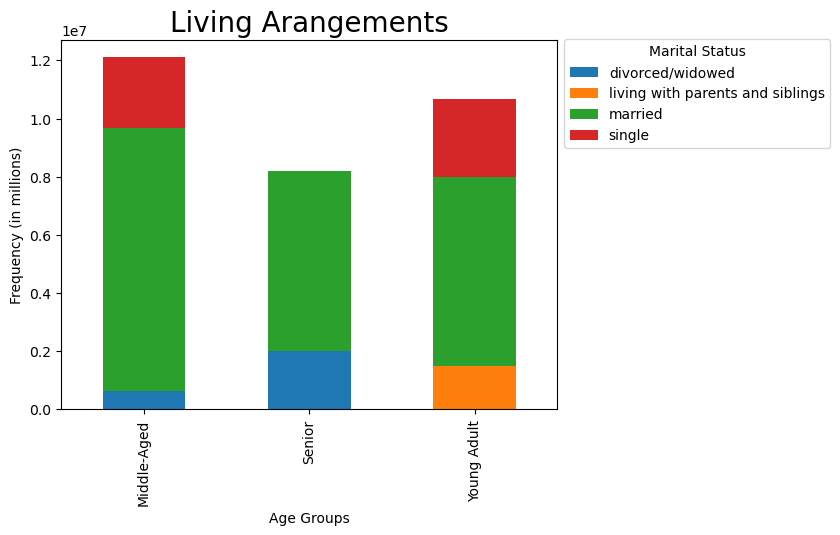

In [49]:
# Create a stacked bar chart

bar_chart_age_family_status = crosstab_age_family_status.plot(kind='bar', stacked=True)
bar_chart_age_family_status.legend(title = 'Marital Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Living Arangements', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Age Groups')

# Export

In [54]:
bar_chart_age_family_status.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_chart_age_family_status.png'))
bar_family_department.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_family_department.png'))
bar_family_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_family_region.png'))
bar_income_department.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income_department.png'))
bar_income_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income_region.png'))
bar_age_department.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_department.png'))
bar_age_region.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_region.png'))
bar_departments.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_departments.png'))
bar_household_size.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_household_size.png'))
bar_income_group.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_income_group.png'))
bar_age_group.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_age_group.png'))